# Hyperparameter tuning

In this notebook we train a k nearest neighbors classificer on the (real) dataset for breast tumour instances. We show how the hyperparameters can be tuned using each of the methodologies we have discussed.

In [8]:
import mglearn
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import scipy as scipy
import seaborn as sns

Here we load and investigate the data:

In [9]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
# Let's learn a little about the dataset:
print(cancer.keys())
print(cancer['DESCR'])
cancer['data'][1:10]

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these 

array([[2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
        1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
        4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02,
        2.250e-02, 4.571e-03, 2.357e+01, 2.553e+01, 1.525e+02, 1.709e+03,
        1.444e-01, 4.245e-01, 4.504e-01, 2.430e-01, 3.613e-01, 8.758e-02],
       [1.142e+01, 2.038e+01, 7.758e+01, 3.861e+02, 1.425e-01, 2.839e-01,
        2.414e-01, 1.052e-01, 2.597e-01, 9.744e-02, 4.956e-01, 1.156e+00,
        3.445e+00, 2.723e+01, 9.110e-03, 7.458e-02, 5.661e-02, 1.867e-02,
        5.963e-02, 9.208e-03, 1.491e

## Selecting hyperparameters using a test-set

In [10]:
# Divide the data into training and test
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=69)

We train several k-nearest-neighbor models on the data with various values of k, and plot the train and test accuracies:

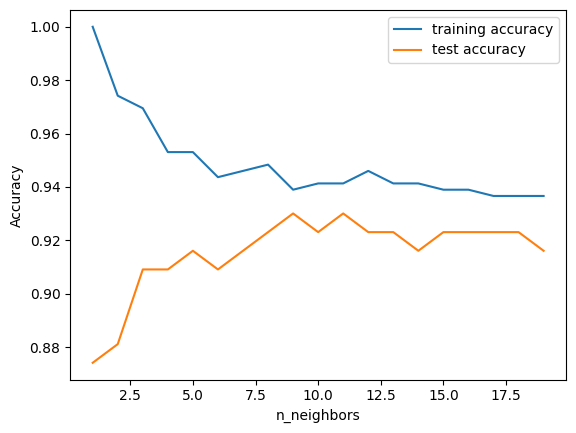

In [11]:
from sklearn.neighbors import KNeighborsClassifier

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 20
neighbors_settings = range(1, 20)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend();

The graph shows that we achieve a good trade-off between high accuracy and low overfitting around n_neighbors = 11 or 12, so this is probably one of these values we should use for our final model! 

## Selecting hyperparameters using a validation set

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer

Divide the data into training data, validation data, and test data

In [13]:
cancer = load_breast_cancer()
X_trainval, X_test, y_trainval, y_test = train_test_split(cancer.data, cancer.target, random_state=69)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, random_state=69)
print("Size of training set:{}".format(X_train.shape[0]))
print("Size of validation set:{}".format(X_val.shape[0]))
print("Size of test set:{}".format(X_test.shape[0]))

Size of training set:319
Size of validation set:107
Size of test set:143


Find the best number of neighbors using the validation set

In [14]:
best_score = 0
for num_neighbors in range(1,15):
    # Learn the model with a certain numnber of neighbors
    knn = KNeighborsClassifier(n_neighbors=num_neighbors)
    knn.fit(X_train, y_train)
    
    # Evaluate the model
    score = knn.score(X_val, y_val)
    
    # If improvement, store score and parameter
    if score>best_score:
        best_score = score
        best_num_neighbors = num_neighbors

# Build a model on the combine training and valiation data
knn = KNeighborsClassifier(n_neighbors=best_num_neighbors)
knn.fit(X_trainval, y_trainval)

print("Best number of neighbors found: {}".format(best_num_neighbors))
print("Best score on validation set: {}".format(best_score))
print("Score on training/validation set: {}".format(knn.score(X_trainval, y_trainval)))
print("Score on test set: {}".format(knn.score(X_test, y_test)))

Best number of neighbors found: 1
Best score on validation set: 0.9439252336448598
Score on training/validation set: 1.0
Score on test set: 0.9020979020979021


## Selecting hyperparameters using cross validation

Divide the data into training data and test data (no validation data!)

In [15]:
cancer = load_breast_cancer()
X_trainval, X_test, y_trainval, y_test = train_test_split(cancer.data, cancer.target, random_state=69)
print("Size of training set:{}".format(X_train.shape[0]))
print("Size of test set:{}".format(X_test.shape[0]))

Size of training set:319
Size of test set:143


Find the best number of neighbors using cross validation

In [16]:
from sklearn.model_selection import cross_val_score
best_score = 0
for num_neighbors in range(1,15):
    # Set a certain number of neighbors
    knn = KNeighborsClassifier(n_neighbors=num_neighbors)
    
    # Perform cross validation
    scores = cross_val_score(knn, X_trainval, y_trainval, cv=5)
    
    # Compute the mean score
    score = scores.mean()
    
    # If improvement, store score and parameter
    if score>best_score:
        best_score = score
        best_num_neighbors = num_neighbors

# Build a model on the combine training and valiation data
knn = KNeighborsClassifier(n_neighbors=best_num_neighbors)
knn.fit(X_trainval, y_trainval)

print("Best number of neighbors found: {}".format(best_num_neighbors))
print("Best average score: {}".format(best_score))
print("Score on training/validation set: {}".format(knn.score(X_trainval, y_trainval)))
print("Score on test set: {}".format(knn.score(X_test, y_test)))

Best number of neighbors found: 8
Best average score: 0.9436662106703146
Score on training/validation set: 0.9460093896713615
Score on test set: 0.9300699300699301


### Leave one out cross validation

Leave one out cross validation is a special type of cross validation, where each fold is a single sample
* Can provides better estimates on smaller datasets, but is more time.consuming

In [32]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()

In [33]:
clf = KNeighborsClassifier()
scores = cross_val_score(clf, cancer.data, cancer.target, cv=loo)

In [34]:
print("Cross validation scores: {}".format(scores))

Cross validation scores: [1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1

In [35]:
print("Average cross validation score: {}".format(scores.mean()))

Average cross validation score: 0.9332161687170475


In [36]:
print("Standard deviation of the cross validation scores: {}".format(scores.std()))

Standard deviation of the cross validation scores: 0.24964725346400804


Let's find the best value of the k-hyperparameter using leave-one-out cross validation:

In [37]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
best_score = 0
for num_neighbors in range(1,15):
    # Set a certain number of neighbors
    knn = KNeighborsClassifier(n_neighbors=num_neighbors)
    
    # Perform leave-one-out cross ("loo") validation
    scores = cross_val_score(knn, X_trainval, y_trainval, cv=loo) 
    
    # Compute the mean score
    score = scores.mean()
    
    # If improvement, store score and parameter
    if score>best_score:
        best_score = score
        best_num_neighbors = num_neighbors

# Build a model on the combine training and valiation data
knn = KNeighborsClassifier(n_neighbors=best_num_neighbors)
knn.fit(X_trainval, y_trainval)

print("Best number of neighbors found: {}".format(best_num_neighbors))
print("Best average score: {}".format(best_score))
print("Score on training/validation set: {}".format(knn.score(X_trainval, y_trainval)))
print("Score on test set: {}".format(knn.score(X_test, y_test)))

Best number of neighbors found: 8
Best average score: 0.9436619718309859
Score on training/validation set: 0.9460093896713615
Score on test set: 0.972027972027972


### sklearn actually has support for hyperparameter search using cross validation:

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [39]:
# Fix the parameter space
parameters = {'n_neighbors': range(1,15)}
grid_search = GridSearchCV(KNeighborsClassifier(), parameters, cv=5, return_train_score=True)

In [40]:
# Load the data and divide into train and test
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=42)

Perform the search; all results are stored within `grid_search`

In [41]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 15)}, return_train_score=True)

Print some results

In [42]:
print("Test score: {:.2f}".format(grid_search.score(X_test, y_test)))

Test score: 0.96


In [43]:
print("Best parameter: {}".format(grid_search.best_params_))

Best parameter: {'n_neighbors': 8}


In [29]:
print("Best cross-validation score: {}".format(grid_search.best_score_))

Best cross-validation score: 0.9294391244870042


In [30]:
print("Best estimator: {}".format(grid_search.best_estimator_))

Best estimator: KNeighborsClassifier(n_neighbors=8)


In [31]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.000203,0.000405,0.009550,0.000691,1,{'n_neighbors': 1},0.965116,0.870588,0.905882,0.894118,...,0.905964,0.031721,14,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,0.000400,0.000489,0.008017,0.001194,2,{'n_neighbors': 2},0.953488,0.905882,0.917647,0.882353,...,0.913051,0.023244,12,0.958824,0.964809,0.967742,0.970674,0.970674,0.966545,0.004431
2,0.000304,0.000402,0.008502,0.000937,3,{'n_neighbors': 3},0.953488,0.882353,0.976471,0.882353,...,0.920109,0.038326,6,0.938235,0.956012,0.938416,0.953079,0.944282,0.946005,0.007363
3,0.000604,0.000493,0.007944,0.000743,4,{'n_neighbors': 4},0.953488,0.882353,0.952941,0.858824,...,0.910698,0.037771,13,0.929412,0.956012,0.935484,0.938416,0.935484,0.938962,0.009015
4,0.000603,0.000493,0.007909,0.000239,5,{'n_neighbors': 5},0.953488,0.870588,0.976471,0.858824,...,0.915404,0.045595,10,0.917647,0.950147,0.929619,0.935484,0.935484,0.933676,0.010500
5,0.000457,0.000462,0.008460,0.000708,6,{'n_neighbors': 6},0.965116,0.882353,0.964706,0.882353,...,0.922435,0.036999,4,0.917647,0.944282,0.920821,0.947214,0.938416,0.933676,0.012169
6,0.000199,0.000399,0.008623,0.000188,7,{'n_neighbors': 7},0.988372,0.870588,0.964706,0.882353,...,0.924733,0.045663,3,0.920588,0.944282,0.926686,0.941349,0.938416,0.934264,0.009080
7,0.000000,0.000000,0.008623,0.000783,8,{'n_neighbors': 8},0.988372,0.870588,0.976471,0.894118,...,0.929439,0.045902,1,0.917647,0.941349,0.923754,0.935484,0.938416,0.931330,0.009083
8,0.000200,0.000400,0.007827,0.000976,9,{'n_neighbors': 9},0.988372,0.870588,0.964706,0.894118,...,0.922380,0.045665,5,0.920588,0.938416,0.923754,0.929619,0.932551,0.928986,0.006324
9,0.000520,0.000466,0.008037,0.000667,10,{'n_neighbors': 10},0.988372,0.882353,0.964706,0.894118,...,0.927086,0.041734,2,0.920588,0.935484,0.923754,0.932551,0.935484,0.929572,0.006218
